In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from pylab import rcParams
rcParams['figure.figsize'] = 16,8

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

import os
from glob import glob

In [3]:
import warnings
warnings.simplefilter(action="ignore")

In [4]:
companies = ["AMAZON", "APPLE", "META", "GOOGLE", "NETFLIX"]
frequency = "daily"
path = os.getcwd()

files = glob(f"/diploma_info/datalake/processed_data/*_{frequency}.csv")
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m-%d')

In [5]:
df = pd.read_csv(
    files[0], 
    parse_dates=['date'],
    date_parser=dateparse,
    index_col=['date']
)
df.tail()

open        high         low       close   adj close  \
date                                                                     
2024-02-26  175.699997  176.369995  174.259995  174.729996  174.729996   
2024-02-27  174.080002  174.619995  172.860001  173.539993  173.539993   
2024-02-28  172.440002  174.050003  172.270004  173.160004  173.160004   
2024-02-29  173.009995  177.220001  172.850006  176.759995  176.759995   
2024-03-01  176.750000  178.729996  176.070007  178.220001  178.220001   

              volume  diff_value  growth  year  month  ...  \
date                                                   ...   
2024-02-26  44368600   -0.260010       0  2024      2  ...   
2024-02-27  31141700   -1.190002       0  2024      2  ...   
2024-02-28  28180500   -0.379990       0  2024      2  ...   
2024-02-29  53805400    3.599991       1  2024      2  ...   
2024-03-01  31956200    1.460007       1  2024      3  ...   

            1_UAH_to_EUR_lag_1  close_max_3_days  close_min_3_days  \
date                                                                 
2024-02-26             0.02411             175.0             169.0   
2024-02-27             0.02401             175.0             175.0   
2024-02-28             0.02410             175.0             174.0   
2024-02-29             0.02423             175.0             173.0   
2024-03-01             0.02433             177.0             173.0   

            close_mean_3_days  close_max_5_days  close_min_5_days  \
date                                                                
2024-02-26              173.0             175.0             167.0   
2024-02-27              175.0             175.0             167.0   
2024-02-28              174.0             175.0             169.0   
2024-02-29              174.0             175.0             173.0   
2024-03-01              174.0             177.0             173.0   

            close_mean_5_days  close_max_7_days  close_min_7_days  \
date                                                                
2024-02-26              171.0             175.0             167.0   
2024-02-27              172.0             175.0             167.0   
2024-02-28              173.0             175.0             167.0   
2024-02-29              174.0             175.0             167.0   
2024-03-01              175.0             177.0             169.0   

            close_mean_7_days  
date                           
2024-02-26              171.0  
2024-02-27              171.0  
2024-02-28              172.0  
2024-02-29              172.0  
2024-03-01              174.0  

[5 rows x 49 columns]

In [6]:
# columns = ['open_price', 'highest_price', 'lowest_price', 'close_price', 'adj_close_price', 'volume']

# df = pd.read_csv(
#     files[2], 
#     parse_dates=['Date'],
#     date_parser=dateparse,
#     index_col=['Date']
# )
# df.columns = columns
# df.index.name = 'date'

In [7]:
# df['year'] = df.index.year
# df['month'] = df.index.month
# df['day'] = df.index.day
# df['day_of_week'] = df.index.weekday
# df['week_of_year'] = (df.index.isocalendar()['week']).astype('int')

In [8]:
df.corr()['growth']

open                 -0.030752
high                 -0.022109
low                  -0.019925
close                -0.011063
adj close            -0.011063
volume               -0.021054
diff_value            0.623569
growth                1.000000
year                 -0.022249
month                -0.050855
day                   0.004149
day_of_week          -0.058080
week_of_year         -0.050586
close_lag_1          -0.039446
volume_lag_1          0.001728
diff_value_lag_1      0.000428
close_lag_2          -0.039469
volume_lag_2         -0.036775
diff_value_lag_2     -0.004568
close_lag_3          -0.039262
volume_lag_3         -0.011994
diff_value_lag_3     -0.032960
close_lag_4          -0.037765
volume_lag_4          0.021804
diff_value_lag_4      0.004894
close_lag_5          -0.037989
volume_lag_5          0.017759
diff_value_lag_5     -0.004349
close_lag_6          -0.037794
volume_lag_6          0.021545
diff_value_lag_6      0.007023
close_lag_7          -0.038116
volume_l

<Axes: >

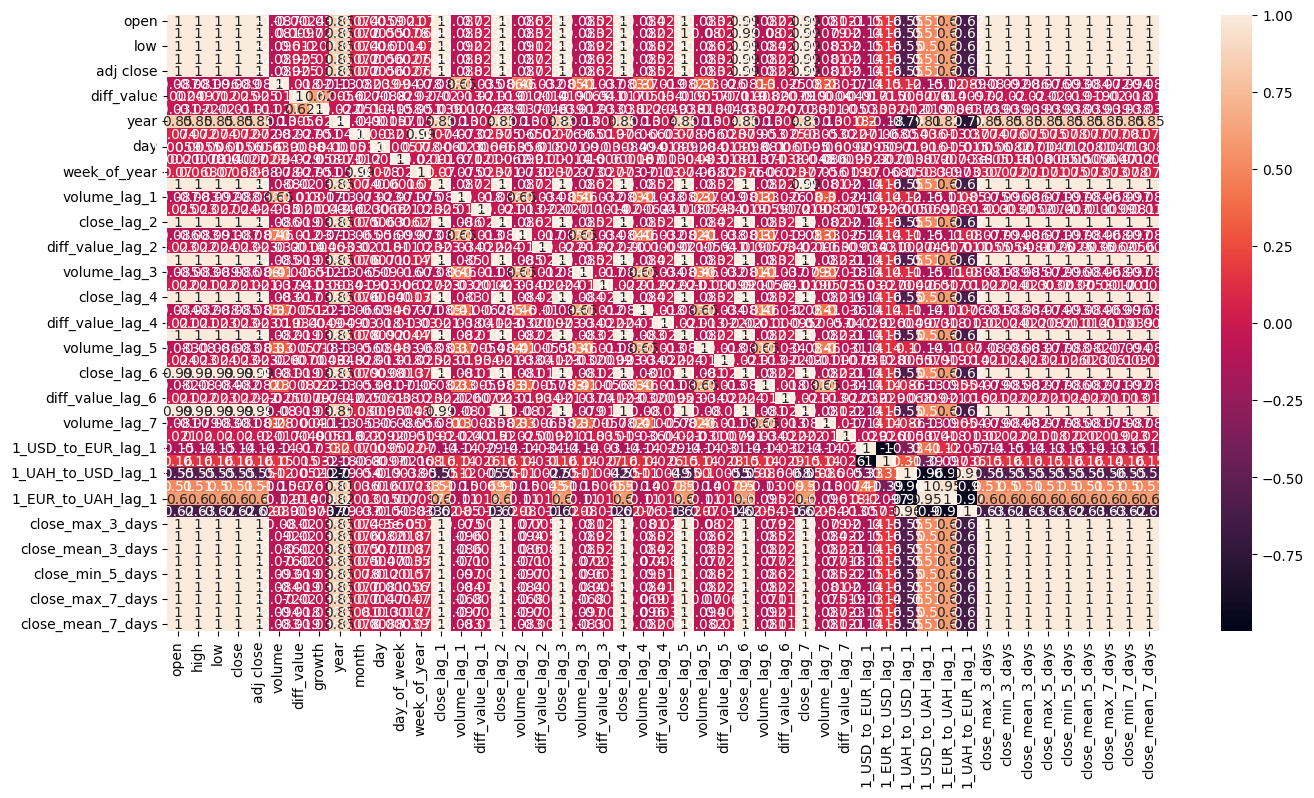

In [9]:
sns.heatmap(df.corr(), annot=True)

In [10]:
df

open        high         low       close   adj close  \
date                                                                     
2015-01-02   15.629000   15.737500   15.348000   15.426000   15.426000   
2015-01-05   15.350500   15.419000   15.042500   15.109500   15.109500   
2015-01-06   15.112000   15.150000   14.619000   14.764500   14.764500   
2015-01-07   14.875000   15.064000   14.766500   14.921000   14.921000   
2015-01-08   15.016000   15.157000   14.805500   15.023000   15.023000   
...                ...         ...         ...         ...         ...   
2024-02-26  175.699997  176.369995  174.259995  174.729996  174.729996   
2024-02-27  174.080002  174.619995  172.860001  173.539993  173.539993   
2024-02-28  172.440002  174.050003  172.270004  173.160004  173.160004   
2024-02-29  173.009995  177.220001  172.850006  176.759995  176.759995   
2024-03-01  176.750000  178.729996  176.070007  178.220001  178.220001   

              volume  diff_value  growth  year  month  ...  \
date                                                   ...   
2015-01-02  55664000   -0.091500       0  2015      1  ...   
2015-01-05  55484000   -0.316500       0  2015      1  ...   
2015-01-06  70380000   -0.345000       0  2015      1  ...   
2015-01-07  52806000    0.156500       1  2015      1  ...   
2015-01-08  61768000    0.102000       1  2015      1  ...   
...              ...         ...     ...   ...    ...  ...   
2024-02-26  44368600   -0.260010       0  2024      2  ...   
2024-02-27  31141700   -1.190002       0  2024      2  ...   
2024-02-28  28180500   -0.379990       0  2024      2  ...   
2024-02-29  53805400    3.599991       1  2024      2  ...   
2024-03-01  31956200    1.460007       1  2024      3  ...   

            1_UAH_to_EUR_lag_1  close_max_3_days  close_min_3_days  \
date                                                                 
2015-01-02             0.05225               0.0               0.0   
2015-01-05             0.05243               0.0               0.0   
2015-01-06             0.05305               0.0               0.0   
2015-01-07             0.05292              15.0              15.0   
2015-01-08             0.05345              15.0              15.0   
...                        ...               ...               ...   
2024-02-26             0.02411             175.0             169.0   
2024-02-27             0.02401             175.0             175.0   
2024-02-28             0.02410             175.0             174.0   
2024-02-29             0.02423             175.0             173.0   
2024-03-01             0.02433             177.0             173.0   

            close_mean_3_days  close_max_5_days  close_min_5_days  \
date                                                                
2015-01-02                0.0               0.0               0.0   
2015-01-05                0.0               0.0               0.0   
2015-01-06                0.0               0.0               0.0   
2015-01-07               15.0               0.0               0.0   
2015-01-08               15.0               0.0               0.0   
...                       ...               ...               ...   
2024-02-26              173.0             175.0             167.0   
2024-02-27              175.0             175.0             167.0   
2024-02-28              174.0             175.0             169.0   
2024-02-29              174.0             175.0             173.0   
2024-03-01              174.0             177.0             173.0   

            close_mean_5_days  close_max_7_days  close_min_7_days  \
date                                                                
2015-01-02                0.0               0.0               0.0   
2015-01-05                0.0               0.0               0.0   
2015-01-06                0.0               0.0               0.0   
2015-01-07                0.0               0.0               0.0   
2015-01-08               

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2306 entries, 2015-01-02 to 2024-03-01
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                2306 non-null   float64
 1   high                2306 non-null   float64
 2   low                 2306 non-null   float64
 3   close               2306 non-null   float64
 4   adj close           2306 non-null   float64
 5   volume              2306 non-null   int64  
 6   diff_value          2306 non-null   float64
 7   growth              2306 non-null   int64  
 8   year                2306 non-null   int64  
 9   month               2306 non-null   int64  
 10  day                 2306 non-null   int64  
 11  day_of_week         2306 non-null   int64  
 12  week_of_year        2306 non-null   int64  
 13  close_lag_1         2306 non-null   float64
 14  volume_lag_1        2306 non-null   float64
 15  diff_value_lag_1    2306 non-null   f

In [12]:
df.describe()

open         high          low        close    adj close  \
count  2306.000000  2306.000000  2306.000000  2306.000000  2306.000000   
mean     93.255541    94.335655    92.085811    93.235140    93.235140   
std      49.169058    49.775121    48.520614    49.141229    49.141229   
min      14.314000    14.539500    14.262500    14.347500    14.347500   
25%      45.352001    45.485250    44.893750    45.227124    45.227124   
50%      91.313248    92.098751    90.363251    91.130753    91.130753   
75%     136.815876   138.825001   135.152496   137.409752   137.409752   
max     187.199997   188.654007   184.839493   186.570496   186.570496   

             volume   diff_value       growth         year        month  ...  \
count  2.306000e+03  2306.000000  2306.000000  2306.000000  2306.000000  ...   
mean   7.948132e+07     0.070556     0.535126  2019.088031     6.454900  ...   
std    4.052944e+07     2.236435     0.498873     2.643465     3.460205  ...   
min    1.762600e+07   -20.314995     0.000000  2015.000000     1.000000  ...   
25%    5.353200e+07    -0.629872     0.000000  2017.000000     3.000000  ...   
50%    6.792655e+07     0.067001     1.000000  2019.000000     6.000000  ...   
75%    9.278350e+07     0.828499     1.000000  2021.000000     9.000000  ...   
max    4.771220e+08    18.793991     1.000000  2024.000000    12.000000  ...   

       1_UAH_to_EUR_lag_1  close_max_3_days  close_min_3_days  \
count         2306.000000       2306.000000       2306.000000   
mean             0.032602         94.286210         91.859931   
std              0.004987         49.800352         48.497815   
min              0.023620          0.000000          0.000000   
25%              0.030050         45.000000         45.000000   
50%              0.032390         92.000000         90.000000   
75%              0.034910        138.000000        134.000000   
max              0.056590        187.000000        186.000000   

       close_mean_3_days  close_max_5_days  close_min_5_days  \
count        2306.000000       2306.000000       2306.000000   
mean           93.078057         94.968343         91.001301   
std            49.142124         50.226907         48.086757   
min             0.000000          0.000000          0.000000   
25%            45.000000         45.000000         45.000000   
50%            91.000000         92.000000         89.000000   
75%           136.750000        140.000000        133.000000   
max           186.000000        187.000000        184.000000   

       close_mean_5_days  close_max_7_days  close_min_7_days  \
count         2306.00000       2306.000000       2306.000000   
mean            92.98569         95.494796         90.304423   
std             49.14579         50.561937         47.772891   
min              0.00000          0.000000          0.000000   
25%             45.00000         45.000000         44.000000   
50%             91.00000         93.000000         88.000000   
75%            136.00000        142.000000        132.000000   
max            185.00000        187.000000        184.000000   

       close_mean_7_days  
count        2306.000000  
mean           92.903729  
std            49.155359  
min             0.000000  
25%            45.000000  
50%            91.000000  
75%           136.000000  
max           185.000000  

[8 rows x 49 columns]

In [13]:
# pd.date_range('2024-02-15', '2024-03-15', freq='B')    # producing date_range for only business days